<a href="https://colab.research.google.com/github/TimkaThymineTimiryazevskaya/sf_data_science/blob/main/EDA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ab_data = pd.read_csv('ab_data.zip')

In [ ]:
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [ ]:
ab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290482 entries, 0 to 290481
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    290482 non-null  int64 
 1   timestamp  290482 non-null  object
 2   group      290482 non-null  object
 3   converted  290482 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 8.9+ MB


In [ ]:
ab_data['timestamp'] = pd.to_datetime(ab_data['timestamp'], format='%Y-%m-%d')

In [ ]:
daily_data = ab_data.groupby(['timestamp','group']).agg({
    'user_id':'count',
    'converted':'sum'
}).reset_index().rename(columns={'user_id': 'users_count'})
daily_data.head()

,timestamp,group,users_count,converted
0,2017-01-02,A,2851,357
1,2017-01-02,B,2848,339
2,2017-01-03,A,6584,749
3,2017-01-03,B,6620,754
4,2017-01-04,A,6573,797


In [ ]:
daily_data['conversion'] = daily_data['converted']/daily_data['users_count']*100
print(daily_data.head(10))

   timestamp group  users_count  converted  conversion
0 2017-01-02     A         2851        357   12.521922
1 2017-01-02     B         2848        339   11.903090
2 2017-01-03     A         6584        749   11.376063
3 2017-01-03     B         6620        754   11.389728
4 2017-01-04     A         6573        797   12.125361
5 2017-01-04     B         6538        763   11.670236
6 2017-01-05     A         6419        791   12.322792
7 2017-01-05     B         6509        743   11.414964
8 2017-01-06     A         6604        762   11.538462
9 2017-01-06     B         6735        834   12.383073


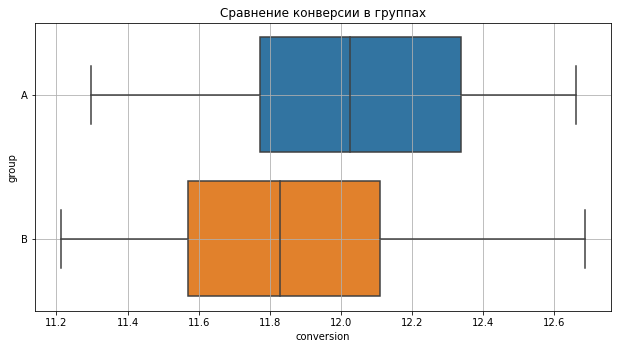

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4)) 
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1]) 
# строим boxplot для conversion по признаку group
sns.boxplot(data=daily_data, x='conversion', y='group', ax=ax) 
# задаём подпись к графику
ax.set_title('Сравнение конверсии в группах')
# задаём отображение сетки
ax.grid();

In [ ]:
conversion_piv = daily_data.groupby('group')['conversion'].agg(
    ['mean', 'median']
)
display(conversion_piv)

,mean,median
group,,
A,12.032876,12.024261
B,11.872697,11.829582


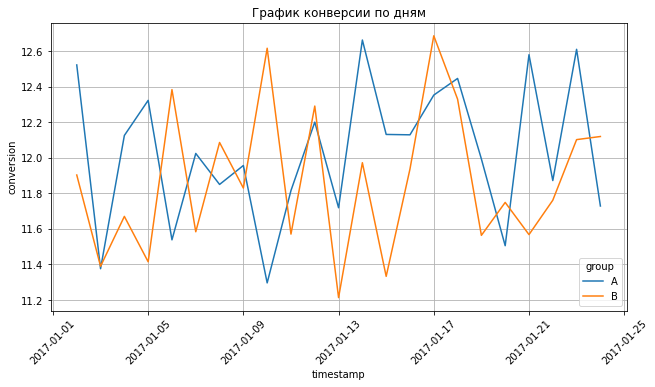

In [ ]:


# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для конверсии во времени в каждой группе
sns.lineplot(
    data=daily_data,
    x='timestamp',
    y='conversion',
    hue='group', 
    ax=ax
)
# задаём подпись к графику
ax.set_title('График конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation=45)
# задаём отображение сетки
ax.grid();

In [ ]:
# выделяем данные группы А
daily_data_a = daily_data[daily_data['group'] == 'A']
# считаем кумулятивное количество посетителей
daily_data_a.loc[:, 'cum_users_count'] = daily_data_a['users_count'].cumsum()
# выводим время, количество посетителей и кумулятивное количество посетителей
display(daily_data_a[['timestamp', 'users_count', 'cum_users_count']].head())

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,timestamp,users_count,cum_users_count
0,2017-01-02,2851,2851
2,2017-01-03,6584,9435
4,2017-01-04,6573,16008
6,2017-01-05,6419,22427
8,2017-01-06,6604,29031


In [ ]:
# вычисляем кумулятивную сумму количества посетителей
daily_data['cum_users_count'] = daily_data.groupby(['group'])['users_count'].cumsum()
# вычисляем кумулятивную сумму количества совершённых целевых действий
daily_data['cum_converted'] = daily_data.groupby(['group'])['converted'].cumsum()
# вычисляем кумулятивную конверсию
daily_data['cum_conversion'] = daily_data['cum_converted']/daily_data['cum_users_count'] * 100
display(daily_data.head())

,timestamp,group,users_count,converted,conversion,cum_users_count,cum_converted,cum_conversion
0,2017-01-02,A,2851,357,12.521922,2851,357,12.521922
1,2017-01-02,B,2848,339,11.903090,2848,339,11.903090
2,2017-01-03,A,6584,749,11.376063,9435,1106,11.722311
3,2017-01-03,B,6620,754,11.389728,9468,1093,11.544149
4,2017-01-04,A,6573,797,12.125361,16008,1903,11.887806


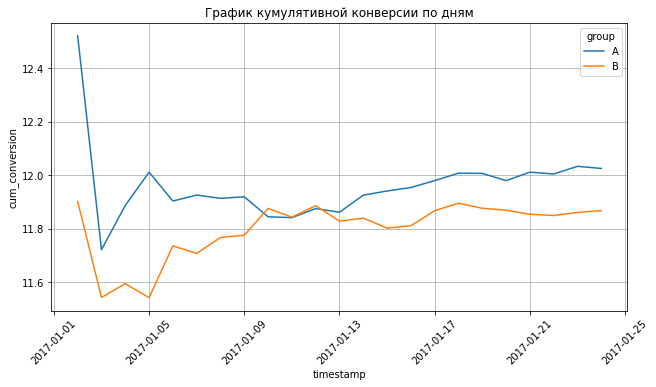

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='timestamp', y='cum_conversion', data=daily_data, hue='group', ax=ax)
# задаём подпись к графику
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [ ]:
sample_a = pd.read_csv('ab_test-redesign_sample_a.zip')
sample_b = pd.read_csv('ab_test-redesign_sample_b.zip')

In [ ]:
sample_a['date'] = pd.to_datetime(sample_a['date'])
sample_b['date'] = pd.to_datetime(sample_b['date'])
sample_aa = pd.DataFrame()
sample_aa= sample_a.groupby('date')['cid'].agg('count')
sample_aa['trans_count'] = sample_a.groupby('date')['transactions'].agg('sum')
sample_aa['rev_count'] = sample_a.groupby('date')['revenue'].agg('sum')
sample_aa


date
2020-11-06 00:00:00                                                 2576
2020-11-07 00:00:00                                                 2704
2020-11-08 00:00:00                                                 3354
2020-11-09 00:00:00                                                 3234
2020-11-10 00:00:00                                                 3022
2020-11-11 00:00:00                                                 3218
2020-11-12 00:00:00                                                 3467
2020-11-13 00:00:00                                                 3676
2020-11-14 00:00:00                                                 3372
2020-11-15 00:00:00                                                 3881
2020-11-16 00:00:00                                                 4766
2020-11-17 00:00:00                                                 4309
2020-11-18 00:00:00                                                 3718
2020-11-19 00:00:00                           

In [ ]:
sample_aa = pd.DataFrame()
sample_aa['user_count']= sample_a.groupby('date')['cid'].agg('count')
sample_aa['trans_count'] = sample_a.groupby('date')['transactions'].agg('sum')
sample_aa['rev_count'] = sample_a.groupby('date')['revenue'].agg('sum')
sample_aa.head()

,user_count,trans_count,rev_count
date,,,
2020-11-06,2576,16,1577279
2020-11-07,2704,23,1721886
2020-11-08,3354,25,846051
2020-11-09,3234,18,708830
2020-11-10,3022,29,826984


In [ ]:
sample_bb = pd.DataFrame()
sample_bb['user_count']= sample_b.groupby('date')['cid'].agg('count')
sample_bb['trans_count'] = sample_b.groupby('date')['transactions'].agg('sum')
sample_bb['rev_count'] = sample_b.groupby('date')['revenue'].agg('sum')
sample_bb.head()

,user_count,trans_count,rev_count
date,,,
2020-11-06,2499,19,996645
2020-11-07,2804,19,555499
2020-11-08,3291,24,3044842
2020-11-09,3062,25,1285836
2020-11-10,3072,30,2414726


In [ ]:
sample_aa['user_count_cs']= sample_aa['user_count'].cumsum()
sample_aa['trans_count_cs']= sample_aa['trans_count'].cumsum()
sample_aa['rev_count_cs']= sample_aa['rev_count'].cumsum()
sample_aa['mean_check'] = round(sample_aa['rev_count_cs']/sample_aa['trans_count_cs']*100,2)
sample_aa['mean_conv'] = sample_aa['trans_count_cs']/sample_aa['user_count_cs']*100
display(sample_aa)

,user_count,trans_count,rev_count,user_count_cs,trans_count_cs,rev_count_cs,mean_check,mean_conv
date,,,,,,,,
2020-11-06,2576,16,1577279,2576,16,1577279,9857993.75,0.621118
2020-11-07,2704,23,1721886,5280,39,3299165,8459397.44,0.738636
2020-11-08,3354,25,846051,8634,64,4145216,6476900.00,0.741256
2020-11-09,3234,18,708830,11868,82,4854046,5919568.29,0.690934
2020-11-10,3022,29,826984,14890,111,5681030,5118045.05,0.745467
2020-11-11,3218,19,1209656,18108,130,6890686,5300527.69,0.717915
2020-11-12,3467,19,607839,21575,149,7498525,5032567.11,0.690614
2020-11-13,3676,36,1338816,25251,185,8837341,4776941.08,0.732644
2020-11-14,3372,30,2659277,28623,215,11496618,5347264.19,0.751144


In [ ]:
sample_bb['user_count_cs']= sample_bb['user_count'].cumsum()
sample_bb['trans_count_cs']= sample_bb['trans_count'].cumsum()
sample_bb['rev_count_cs']= sample_bb['rev_count'].cumsum()
sample_bb['mean_check'] = round(sample_bb['rev_count_cs']/sample_bb['trans_count_cs']*100,2)
sample_bb['mean_conv'] = sample_bb['trans_count_cs']/sample_bb['user_count_cs']*100
display(sample_bb)

,user_count,trans_count,rev_count,user_count_cs,trans_count_cs,rev_count_cs,mean_check,mean_conv
date,,,,,,,,
2020-11-06,2499,19,996645,2499,19,996645,5245500.00,0.760304
2020-11-07,2804,19,555499,5303,38,1552144,4084589.47,0.716576
2020-11-08,3291,24,3044842,8594,62,4596986,7414493.55,0.721434
2020-11-09,3062,25,1285836,11656,87,5882822,6761864.37,0.746397
2020-11-10,3072,30,2414726,14728,117,8297548,7091921.37,0.794405
2020-11-11,3208,22,3555727,17936,139,11853275,8527535.97,0.774978
2020-11-12,3494,25,915653,21430,164,12768928,7785931.71,0.765282
2020-11-13,3606,37,1703475,25036,201,14472403,7200200.50,0.802844
2020-11-14,3276,34,2369998,28312,235,16842401,7166979.15,0.830037


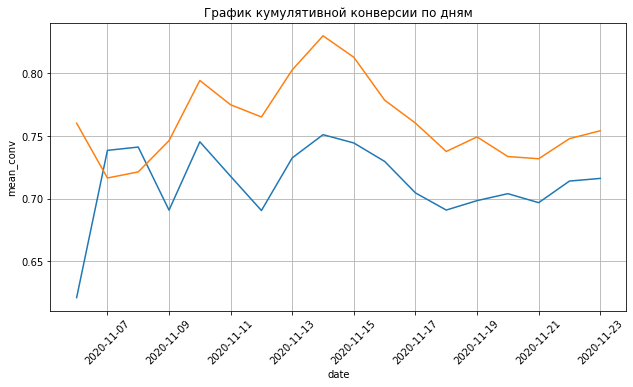

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='mean_conv', data=sample_aa, ax=ax)
# задаём подпись к графику
sns.lineplot(x='date', y='mean_conv', data=sample_bb, ax=ax)
ax.set_title('График кумулятивной конверсии по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

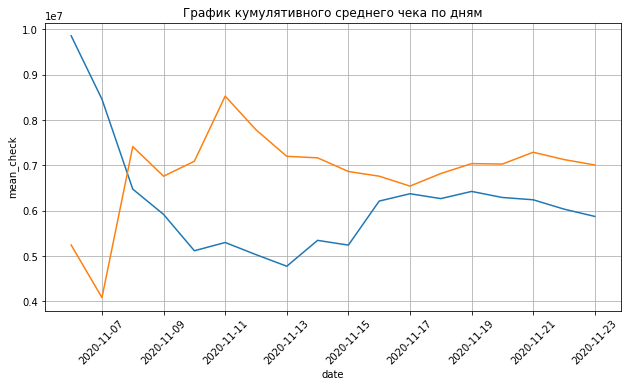

In [ ]:
# создаём фигуру размером 8x4
fig = plt.figure(figsize=(8, 4))
# добавляем систему координат
ax = fig.add_axes([1, 1, 1, 1])
# строим lineplot для кумулятивной конверсии во времени в каждой группе
sns.lineplot(x='date', y='mean_check', data=sample_aa, ax=ax)
# задаём подпись к графику
sns.lineplot(x='date', y='mean_check', data=sample_bb, ax=ax)
ax.set_title('График кумулятивного среднего чека по дням')
# задаём поворот меток на оси абсцисс
ax.xaxis.set_tick_params(rotation = 45)
# задаём отображение сетки
ax.grid(True);

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
converted_piv= ab_data.groupby('group')['converted'].agg(
    ['sum', 'count']
)
display(converted_piv)

,sum,count
group,,
A,17467,145241
B,17238,145241


In [ ]:
# нулевая и альтернативная гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А выше, чем конверсия в группе B'
alpha = 0.05 # уровень значимости
# вычисляем значение p-value для z-теста для пропорций
_, p_value = proportions_ztest(
    count=converted_piv['sum'], #число "успехов"
    nobs=converted_piv['count'], #общее число наблюдений
    alternative='larger',
)
# выводим результат на экран
print('p-value: ', round(p_value, 2))
# сравниваем полученное p-value с уровнем значимости
if (p_value < alpha): 
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value:  0.1
# Принимаем нулевую гипотезу. Конверсии в группах А и B равны

p-value:  0.1
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


In [ ]:
time_data = pd.read_excel('time_data.xlsx')
display(time_data.head())

,time(A),time(B)
0,435.0,549.2
1,454.5,630.2
2,447.0,437.2
3,480.0,637.2
4,561.0,712.4


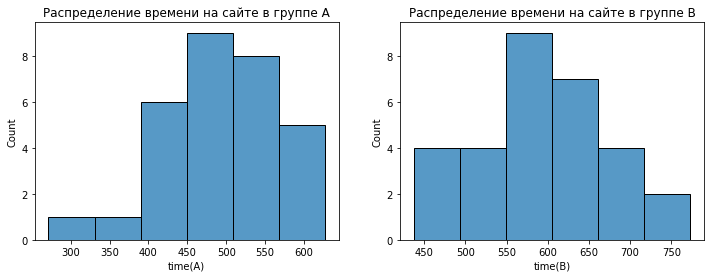

In [ ]:
#создаём 2 графика размером 12x4
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
#строим гистограмму для времени на сайте в каждой группе
sns.histplot(x='time(A)', data=time_data, ax=axes[0])
sns.histplot(x='time(B)', data=time_data, ax=axes[1])
#задаём названия графикам
axes[0].set_title('Распределение времени на сайте в группе А');
axes[1].set_title('Распределение времени на сайте в группе B');

In [ ]:
from scipy.stats import shapiro
# нулевая и альтернативная гипотезы
H0 = 'Распределения в обеих группах нормальные'
H1 = 'Распределение в одной или обеих группах отлично от нормального'
alpha = 0.05 # уровень значимости
# вычисляем результат теста Шапиро-Уилка для выборок
shapiro_result_a = shapiro(time_data['time(A)'])
shapiro_result_b = shapiro(time_data['time(B)'])
print('p-value группы А', round(shapiro_result_a.pvalue, 2))
print('p-value группы B', round(shapiro_result_b.pvalue, 2))
# сравниваем полученное p-value с уровнем значимости
if shapiro_result_a.pvalue < alpha or shapiro_result_b.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value группы А 0.43
# p-value группы B 0.12
# Принимаем нулевую гипотезу. Распределения в обеих группах нормальные

p-value группы А 0.43
p-value группы B 0.12
Принимаем нулевую гипотезу. Распределения в обеих группах нормальные


In [ ]:
from scipy.stats import ttest_ind
# нулевая и альтернативная гипотезы
H0 = 'Среднее время в группах одинаково'
H1 = 'Среднее время в группе А меньше, чем в группе B'
alpha = 0.05 #уровень значимости
#вычисляем результат T-теста для выборок
results = ttest_ind(
    a=time_data['time(A)'],
    b=time_data['time(B)'], 
    alternative='less'
)
print('p-value:', round(results.pvalue, 2))
 
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. {}".format(H0))
    print("Альтернативная гипотеза. H1: {}".format(H1))
else:
    print("Принимаем нулевую гипотезу. {}".format(H0))
 
# p-value: 0.0
# Отвергаем нулевую гипотезу. Среднее время в группах одинаково
# Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B

p-value: 0.0
Отвергаем нулевую гипотезу. Среднее время в группах одинаково
Альтернативная гипотеза. H1: Среднее время в группе А меньше, чем в группе B


In [ ]:
n = 36 # размер выборки
x_mean = 16100 # выборочное среднее
sigma = 12000 # истинное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [ ]:
from scipy.stats import norm
z_crit = -norm.ppf(alpha/2) # z критическое

In [ ]:
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (12180, 20020)


In [ ]:
n = 64 # размер выборки
x_mean = 12.35 # выборочное среднее
sigma = 2.4 # истинное стандартное отклонение
gamma = 0.9 # уровень надёжности
alpha = 1 - gamma # уровень значимости

z_crit = -norm.ppf(alpha/2) # z критическое
print(z_crit)
eps = z_crit * sigma/(n ** 0.5) #погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound,2), round(upper_bound,2)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

1.6448536269514729
Доверительный интервал: (11.86, 12.84)


In [ ]:
n = 15 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 2000 # выборочное среднее
x_std = 400 # выборочное стандартное отклонение
gamma = 0.95 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [ ]:
from scipy.stats import t
t_crit = -t.ppf(alpha/2, k) # t-критическое

In [ ]:
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (1778, 2222)


In [ ]:
n = 25 # размер выборки
k = n - 1 # число степеней свободы
x_mean = 3540 # выборочное среднее
x_std = 1150 # выборочное стандартное отклонение
gamma = 0.9 # уровень надёжности
alpha = 1 - gamma # уровень значимости

In [ ]:
t_crit = -t.ppf(alpha/2, k) # t-критическое
eps = t_crit * x_std/(n ** 0.5) # погрешность
lower_bound = x_mean - eps # левая (нижняя) граница
upper_bound = x_mean + eps # правая (верхняя) граница
confidence_interval = (round(lower_bound), round(upper_bound)) # создаём кортеж из округлённых границ интервала
print('Доверительный интервал: {}'.format(confidence_interval)) # выводим результат

Доверительный интервал: (3146, 3934)


In [ ]:
ab_data = pd.read_csv('ab_data.zip')
ab_data.head()

,user_id,timestamp,group,converted
0,851104,2017-01-21,A,0
1,804228,2017-01-12,A,0
2,661590,2017-01-11,B,0
3,853541,2017-01-08,B,0
4,864975,2017-01-21,A,1


In [ ]:
#фильтруем данные группы А
a_data = ab_data[ab_data['group'] == 'A']
#фильтруем данные группы B
b_data = ab_data[ab_data['group'] == 'B']

In [ ]:
def proportions_conf_interval(n, x_p, gamma=0.95):   
    alpha = 1 - gamma # уровень значимости
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (x_p * (1 - x_p) / n) ** 0.5 #погрешность
    lower_bound = x_p - eps # левая (нижняя) граница
    upper_bound = x_p + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound * 100, 2), round(upper_bound * 100, 2)

In [ ]:
conf_interval_a = proportions_conf_interval(
n=a_data['user_id'].count(), # размер выборки
x_p=a_data['converted'].mean() # выборочная пропорция
)
conf_interval_b = proportions_conf_interval(
n=b_data['user_id'].count(), # размер выборки
x_p=b_data['converted'].mean() # выборочная пропорция
)
print('Доверительный интервал для конверсии группы А: {}'.format(conf_interval_a))
print('Доверительный интервал для конверсии группы B: {}'.format(conf_interval_b))
# Доверительный интервал для конверсии группы А: (11.86, 12.19)
# Доверительный интервал для конверсии группы B: (11.7, 12.03)

Доверительный интервал для конверсии группы А: (11.86, 12.19)
Доверительный интервал для конверсии группы B: (11.7, 12.03)


In [ ]:
def diff_proportions_conf_interval(n, xp, gamma=0.95):
    alpha = 1 - gamma # уровень значимости
    diff = xp[1] - xp[0] # выборочная разница конверсий групп B и A
    z_crit = -norm.ppf(alpha/2) # z критическое
    eps = z_crit * (xp[0] * (1 - xp[0])/n[0] + xp[1] * (1 - xp[1])/n[1]) ** 0.5 # погрешность
    lower_bound = diff - eps # левая (нижняя) граница
    upper_bound = diff + eps # правая (верхняя) граница
    # возвращаем кортеж из округлённых границ интервала
    return round(lower_bound *100, 2), round(upper_bound * 100, 2)

In [ ]:
# размеры выборок групп А и B
n = [a_data['user_id'].count(), b_data['user_id'].count()]
# выборочная пропорция групп A и B
xp = [a_data['converted'].mean(), b_data['converted'].mean()]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))
 
# Доверительный интервал для разности конверсий: (-0.39, 0.08)

Доверительный интервал для разности конверсий: (-0.39, 0.08)


In [ ]:
n = 189
x_p = 132/189
print(x_p)

0.6984126984126984


In [ ]:
b = proportions_conf_interval(n, x_p, gamma=0.90)
print(b)

(64.35, 75.33)


In [ ]:
# размеры выборок групп А и B
n = [1000, 1000]
# выборочная пропорция групп A и B
xp = [0.045, 0.05]
# строим доверительный интервал для разности конверсий
diff_inverval = diff_proportions_conf_interval(n, xp)
print('Доверительный интервал для разности конверсий: {}'.format(diff_inverval))

Доверительный интервал для разности конверсий: (-1.36, 2.36)
